In [2]:
import pandas as pf
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784',version=1)
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
x,y = dataset['data'],dataset['target']
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = x[0]
digit_image = digit.reshape(28,28)

plt.imshow(digit_image, cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
y[0]

'5'

In [7]:
y = y.astype(np.uint8)

In [8]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([digit])

array([False])

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf,x_train,y_train_5,cv=5,scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [13]:
scores

array([0.96666944, 0.96166667, 0.92258333, 0.9615    , 0.96891408])

In [14]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)
    
b_clf = Never5Classifier()

cross_val_score(b_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53524,  1055],
       [ 1651,  3770]], dtype=int64)

In [17]:
y_train_perf = y_train_5
confusion_matrix(y_train_5,y_train_perf)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)


0.7813471502590673

In [19]:
recall_score(y_train_5,y_train_pred)

0.6954436450839329

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7358969353894202

In [21]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5,cv=3,
                            method = 'decision_function')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


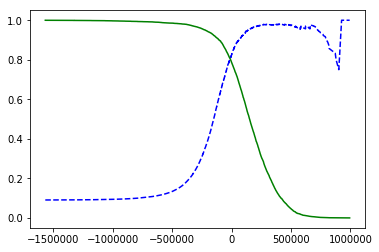

In [23]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-',label='Recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [24]:
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9001457725947521

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.6834532374100719

ROC is the ratio of true positive rate and false negative rate

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

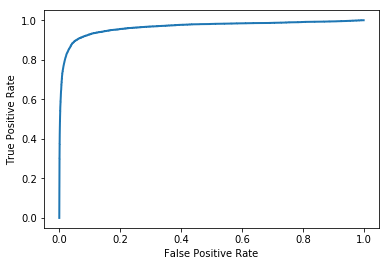

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2,label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9654274795876021

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, x_train,y_train_5, cv=3,
                                  method='predict_proba')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
y_scores_forest = y_proba_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

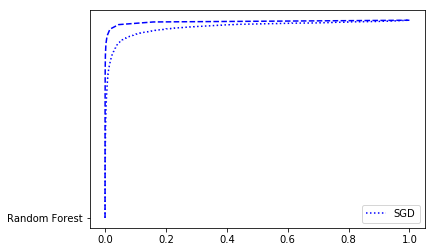

In [ ]:
plt.plot(fpr, tpr,'b:',label='SGD')
plt.plot(fpr_forest, tpr_forest, 'b--','Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
roc_auc_score(y_train_5,y_scores_forest)

0.9920527492698306

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))


In [ ]:
y_train_pred = cross_val_predict(sgd_clf, x_train,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([[5573,    2,   32,   25,   18,   68,   31,    9,  155,   10],
       [   2, 6386,   30,   22,    5,   23,    1,   12,  237,   24],
       [  46,  136, 4782,  196,   63,   71,   52,   82,  483,   47],
       [  23,   27,  130, 5250,   12,  234,   18,   51,  317,   69],
       [  22,   25,   28,   28, 4954,   27,   42,   42,  217,  457],
       [  60,   38,   39,  284,   54, 4249,   49,   16,  542,   90],
       [  39,   34,   70,   11,   33,  180, 5298,   18,  220,   15],
       [  28,   38,   53,   79,   95,   40,    3, 5563,   96,  270],
       [  28,  106,   52,  267,   57,  326,   22,   22, 4854,  117],
       [  31,   24,   14,  172,  246,  142,    2,  202,  247, 4869]],
      dtype=int64)

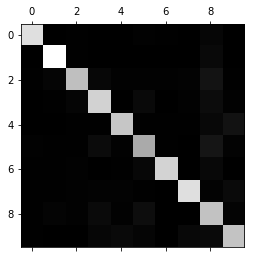

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

Q1. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(x_train, y_train)

y_pred = knn_clf.predict(x_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

In [ ]:
params = {'weights':('uniform','distance'),'n_neighbors':(1,2,3,4,5,6,7)}

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf,params, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train,verbose=1)



In [ ]:
grid_search.best_params_

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
y_pred = final_model.predict(x_test)

In [ ]:
f1_score(y_test, y_pred)

Q2. 


In [ ]:
for i in x:
    x.append(scipy.ndimage.interpolation.shift(i,[1,],cval=0))
    
for j in y:
    y.append(scipy.ndimage.interpolation.shift(j,[1,],cval=0))